<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Missing_Persons_Colombia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries and data**👨‍💻

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px 
plt.style.use('fivethirtyeight')

In [13]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023/desaparecidos.csv',on_bad_lines='skip')
data.head(6)

<ipython-input-13-91972e84a0e3>:1: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



,ID,Estado de la desaparición,Clasificación de la desaparición,Fecha de la desaparición,Edad al momento de la desaparición,Sexo del desaparecido,País de nacimiento del desaparecido,Ancestro racial del desaparecido,Estado civil del desaparecido,Escolaridad del desaparecido,Pertenencia grupal del desaparecido,País donde ocurre la desaparición,Municipio donde ocurre la desaparición DANE,Departamento donde ocurre la desaparición DANE,Contexto
0,1,Desaparecido,Sin Información,2006-12-29T00:00:00.000,21,Hombre,Sin información,Mestizo,Soltero (a),Educación básica secundaria o secundaria baja,Persona adicta a una droga natural o sintética,Sin información,Sin información,Sin información,Desaparición
1,2,Desaparecido,Sin Información,2006-12-26T00:00:00.000,24,Hombre,Colombia,Mestizo,Soltero (a),Educación básica secundaria o secundaria baja,Persona adicta a una droga natural o sintética,Colombia,Bogotá D.C.,Bogotá D.C,Desaparición
2,3,Desaparecido,Sin Información,2006-12-29T00:00:00.000,13,Mujer,Colombia,Mestizo,Soltero (a),Educación básica secundaria o secundaria baja,Ninguno,Colombia,Bogotá D.C.,Bogotá D.C,Desaparición
3,4,Aparecio Muerto,Sin Información,2006-12-31T00:00:00.000,50,Hombre,Colombia,Blanco,Soltero (a),Educación básica primaria,Persona adicta a una droga natural o sintética,Sin información,Sin información,Sin información,Desaparición
4,5,Aparecio Vivo,Sin Información,2006-12-29T00:00:00.000,17,Mujer,Sin información,Mestizo,Soltero (a),Educación técnica profesional y tecnológica,Ninguno,Colombia,Bogotá D.C.,Bogotá D.C,Desaparición
5,6,Aparecio Muerto,Sin Información,2006-12-31T00:00:00.000,41,Mujer,Colombia,Mestizo,Unión Libre,Educación media o secundaria alta,Persona adicta a una droga natural o sintética,Sin información,Sin información,Sin información,Desaparición


# **Explore and clean data**🧹💨

In [8]:
data.shape

(197436, 15)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197436 entries, 0 to 197435
Data columns (total 15 columns):
 #   Column                                          Non-Null Count   Dtype 
---  ------                                          --------------   ----- 
 0   ID                                              197436 non-null  int64 
 1   Estado de la desaparición                       197436 non-null  object
 2   Clasificación de la desaparición                197436 non-null  object
 3   Fecha de la desaparición                        197436 non-null  object
 4   Edad al momento de la desaparición              197436 non-null  object
 5   Sexo del desaparecido                           197436 non-null  object
 6   País de nacimiento del desaparecido             197436 non-null  object
 7   Ancestro racial del desaparecido                197436 non-null  object
 8   Estado civil del desaparecido                   197436 non-null  object
 9   Escolaridad del desaparecido         

In [10]:
data.isnull().sum()

ID                                                0
Estado de la desaparición                         0
Clasificación de la desaparición                  0
Fecha de la desaparición                          0
Edad al momento de la desaparición                0
Sexo del desaparecido                             0
País de nacimiento del desaparecido               0
Ancestro racial del desaparecido                  0
Estado civil del desaparecido                     0
Escolaridad del desaparecido                      0
Pertenencia grupal del desaparecido               0
País donde ocurre la desaparición                 0
Municipio donde ocurre la desaparición DANE       0
Departamento donde ocurre la desaparición DANE    0
Contexto                                          0
dtype: int64

In [24]:
data['Fecha de la desaparición'] = pd.to_datetime(data['Fecha de la desaparición'], errors='coerce')

In [18]:
data['Edad al momento de la desaparición'] = data['Edad al momento de la desaparición'].apply(lambda x:x==0 if x == f"Sin información" else x)

In [23]:
data['Edad al momento de la desaparición'] = data['Edad al momento de la desaparición'].astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197436 entries, 0 to 197435
Data columns (total 15 columns):
 #   Column                                          Non-Null Count   Dtype         
---  ------                                          --------------   -----         
 0   ID                                              197436 non-null  int64         
 1   Estado de la desaparición                       197436 non-null  object        
 2   Clasificación de la desaparición                197436 non-null  object        
 3   Fecha de la desaparición                        197335 non-null  datetime64[ns]
 4   Edad al momento de la desaparición              197436 non-null  float64       
 5   Sexo del desaparecido                           197436 non-null  object        
 6   País de nacimiento del desaparecido             197436 non-null  object        
 7   Ancestro racial del desaparecido                197436 non-null  object        
 8   Estado civil del desaparecido     

In [31]:
data['Departamento donde ocurre la desaparición DANE'].unique()

array(['Sin información', 'Bogotá D.C', 'Valle Del Cauca', 'Atlántico',
       'Cundinamarca', 'Tolima', 'Santander', 'Meta', 'Sin Información',
       'Boyacá', 'Antioquia', 'Risaralda', 'Huila', 'Norte De Santander',
       'Cesar', 'Quindio', 'Bolívar', 'Casanare', 'Cauca', 'Caquetá',
       'Nariño', 'Caldas', 'Chocó', 'Magdalena', 'Arauca', 'Guaviare',
       'La Guajira', 'Desaparecidos en el extranjero', 'Córdoba', 'Sucre',
       'Vichada', 'Putumayo', 'Amazonas', 'Guainía',
       'San Andres Y Providencia', 'Vaupés'], dtype=object)

In [32]:
data['Departamento donde ocurre la desaparición DANE'] = data['Departamento donde ocurre la desaparición DANE'].map(
                                                              {'Antioquia':'ANTIOQUIA','Atlántico':'ATLANTICO','Bogotá, D.C.':'SANTAFE DE BOGOTA D.C',
                                                               'Bolívar':'BOLIVAR','Boyacá':'BOYACA','Caldas':'CALDAS','Caquetá':'CAQUETA','Cauca':'CAUCA','Cesar':'CESAR',
                                                               'Córdoba':'CORDOBA','Cundinamarca':'CUNDINAMARCA','Chocó':'CHOCO','Huila':'HUILA','La Guajira':'LA GUAJIRA',
                                                               'Magdalena':'MAGDALENA','Meta':'META','Nariño':'NARIÑO','Norte de Santander':'NORTE DE SANTANDER','Quindio':'QUINDIO',
                                                               'Risaralda':'RISARALDA','Santander':'SANTANDER','Sucre':'SUCRE','Tolima':'TOLIMA','Valle del Cauca':'VALLE DEL CAUCA',
                                                               'Arauca':'ARAUCA','Casanare':'CASANARE','Putumayo':'PUTUMAYO',
                                                               'San Andres Y Providencia':'ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA',
                                                               'Amazonas':'AMAZONAS','Guainía':'GUAINIA','Guaviare':'GUAVIARE','Vaupés':'VAUPES','Vichada':'VICHADA',
                                                               'Desaparecidos en el extranjero':'Extranjero','Sin Información':'Sin información','Sin información':'Sin información'
                                                               })

In [40]:
print(data['Fecha de la desaparición'].min().year, '\n',data['Fecha de la desaparición'].max().year)

1921 
 2023


# **Charts, plots and insights**📊📈

In [55]:
px.bar(data, x='Estado de la desaparición', color='Estado de la desaparición')

Text(0, 0.5, 'Cantidad')

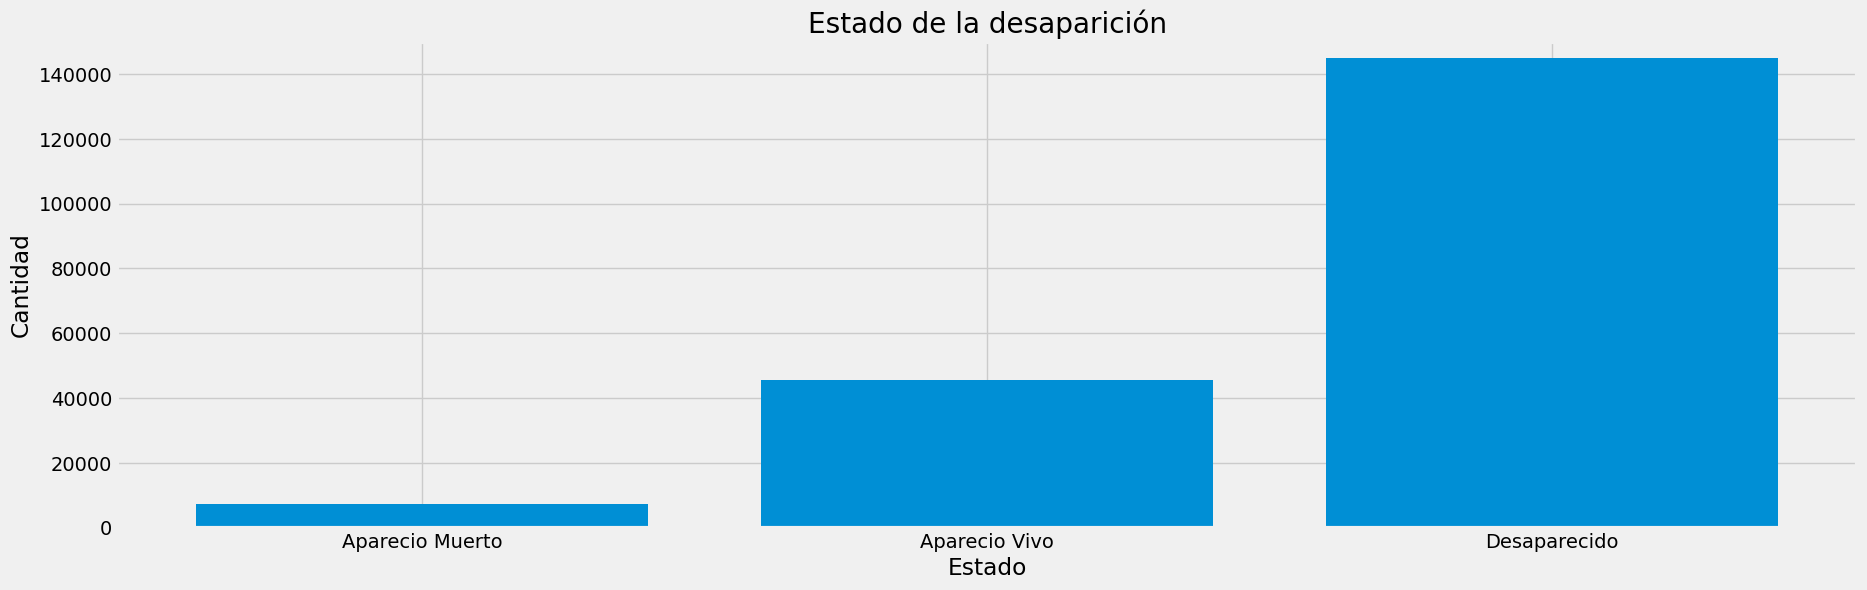

In [58]:
g = data.groupby(['Estado de la desaparición'])['ID'].count()
plt.figure(figsize=(20,6))
plt.bar(x=g.index, height=g.values)
plt.title('Estado de la desaparición')
plt.ylim(0,150000)
plt.xlabel('Estado')
plt.ylabel('Cantidad')


Text(0, 0.5, 'Cantidad')

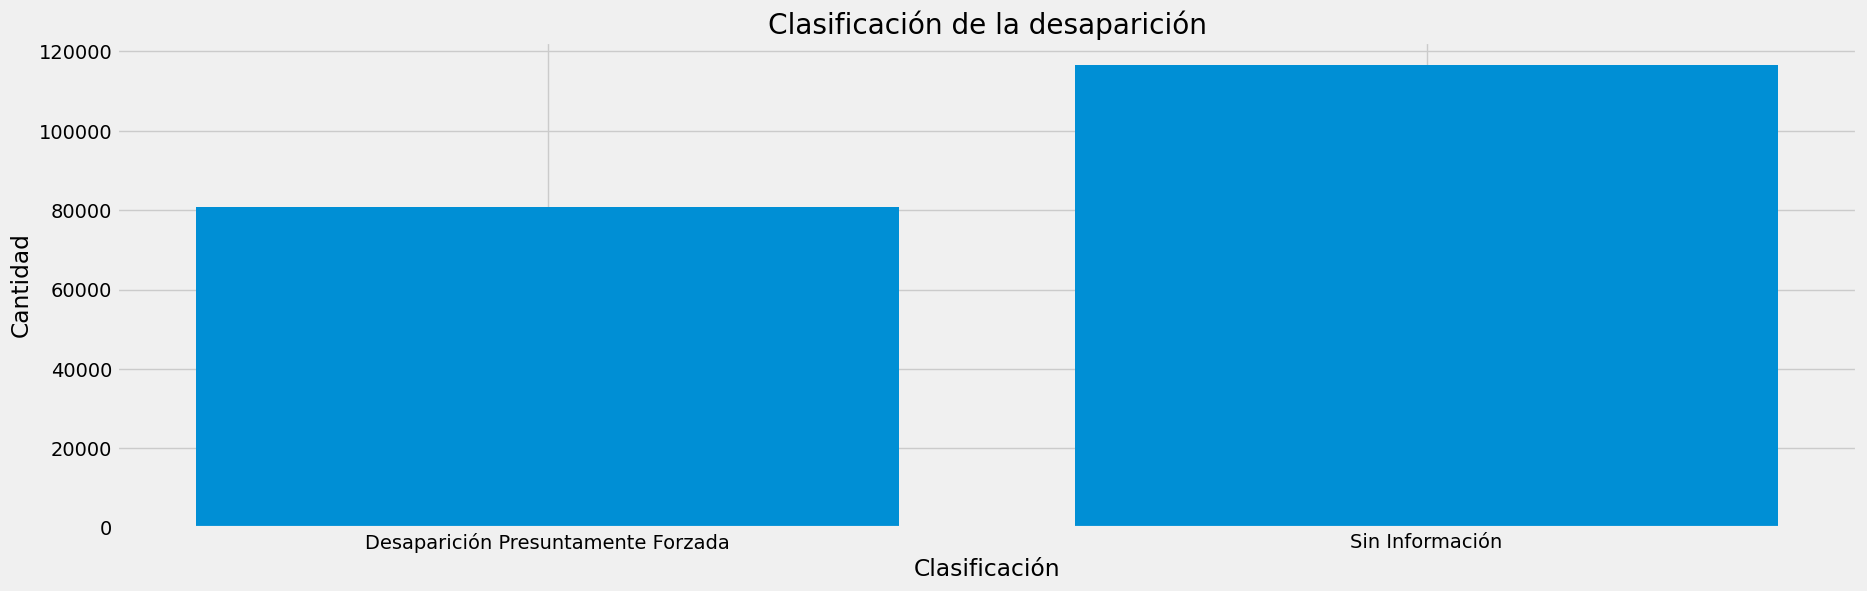

In [60]:
a = data.groupby(['Clasificación de la desaparición'])['ID'].count()
plt.figure(figsize=(20,6))
plt.bar(x=a.index,height=a.values)
plt.title('Clasificación de la desaparición')
plt.xlabel('Clasificación')
plt.ylabel('Cantidad')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197436 entries, 0 to 197435
Data columns (total 15 columns):
 #   Column                                          Non-Null Count   Dtype         
---  ------                                          --------------   -----         
 0   ID                                              197436 non-null  int64         
 1   Estado de la desaparición                       197436 non-null  object        
 2   Clasificación de la desaparición                197436 non-null  object        
 3   Fecha de la desaparición                        197335 non-null  datetime64[ns]
 4   Edad al momento de la desaparición              197436 non-null  float64       
 5   Sexo del desaparecido                           197436 non-null  object        
 6   País de nacimiento del desaparecido             197436 non-null  object        
 7   Ancestro racial del desaparecido                197436 non-null  object        
 8   Estado civil del desaparecido     